In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import math as mt 
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm
import seaborn as sns

In [3]:
df.shape

(19269, 5)

In [2]:
# carregando os dados
df = pd.read_csv('SDSS.csv', header=1, encoding='ISO-8859-1')

# visualizar a matriz de dados
print(df.head())

           ra        dec           l          b  redshift
0  185.658111  10.109711  279.818212  71.676777  0.066915
1  185.683800  10.002223  280.013839  71.585164  0.067356
2  167.685286  10.057578  243.856143  60.775082  0.069497
3  167.692313  10.147275  243.722379  60.837021  0.069129
4  167.706561  10.152525  243.732144  60.851221  0.069356


In [12]:
# select p.objid, p.ra, p.dec, s.z as redshift
# from galaxy p, specobj s
# where p.objid=s.bestobjid

len(df.ra)

127813

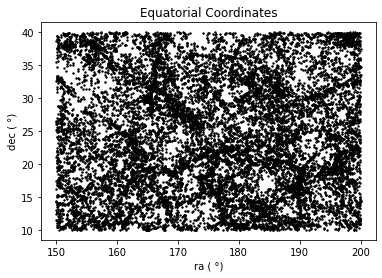

In [16]:
# Plotando as coordenadas equatoriais, ra dec
plt.scatter(df['ra'], df['dec'], color='black', s=2)
plt.xlabel('ra ( °)')
plt.ylabel('dec ( °)')
#plt.yticks(np.arange(-90, 120, 30))
plt.title('Equatorial Coordinates')
#plt.savefig('coordenadas-equatoriais.jpg')
plt.show()

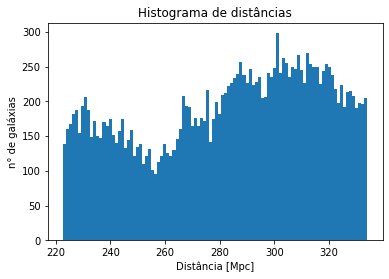

In [17]:
############## Histograma 'distância' ##############
H0 = 67.321       # km/s/Mpc
c = 2.9979*10**5    # km/s
redshift = np.array(df['redshift'])
dist = redshift * c / H0 # Mpc

plt.hist(dist, bins=100)
plt.title('Histograma de distâncias')
plt.ylabel('n° de galáxias')
plt.xlabel('Distância [Mpc]')
#plt.savefig('histograma de distancia.jpg')
plt.show()

In [18]:
# Trasformação de coordenadas
# 'l' e 'b' são dados em graus 
x = dist * np.cos(np.radians(df['b'])) * np.cos(np.radians(df['l']))
y = dist * np.cos(np.radians(df['b'])) * np.sin(np.radians(df['l']))
z = dist * np.sin(np.radians(df['b']))

In [19]:
DataFrame = {'x': x, 'y': y, 'z': z}
DataFrame = pd.DataFrame(data=DataFrame)
DataFrame.head()

,x,y,z
0,15.974375,-92.306822,282.874075
1,16.475990,-93.308185,284.587920
2,-66.578817,-135.641372,270.086386
3,-66.412753,-134.508234,268.819718
4,-66.578111,-134.901056,269.739189


<ipython-input-20-e74ffc74399d>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  grafico = figura.gca(projection='3d')


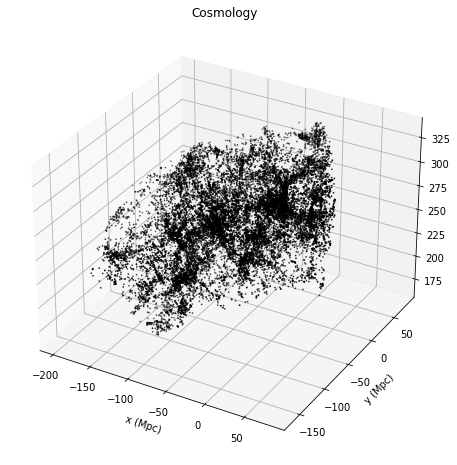

In [20]:
figura = plt.figure(figsize=(8, 8))
grafico = figura.gca(projection='3d')
grafico.scatter(x,y,z, s=0.5, color='black')
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.title('Cosmology')
plt.show()

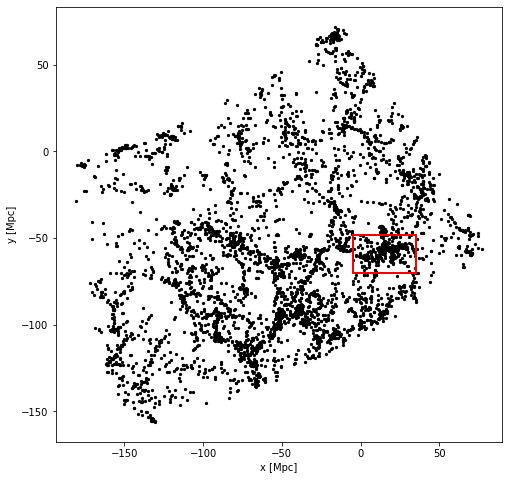

In [21]:
cond = np.where((dist > 295) & (dist < 315))



figura = plt.figure(figsize=(8, 8))
plt.scatter(x[cond[0]], y[cond[0]], color='black', s=5)
plt.xlabel('x [Mpc]')
plt.ylabel('y [Mpc]')

plt.plot([-5,-5], [-48,-70], linewidth=2, color='red')
plt.plot([35,35], [-48,-70], linewidth=2, color='red')
plt.plot([-5,35], [-48,-48], linewidth=2, color='red')
plt.plot([-5,35], [-70,-70], linewidth=2, color='red')

#plt.yticks(np.arange(-90, 120, 30))
plt.show()

In [73]:
select = np.where((dist > 300) & (dist < 320) & (x > -5) & (x < 35) & (y > -70) & (y < -48))
z = 0
z = dist

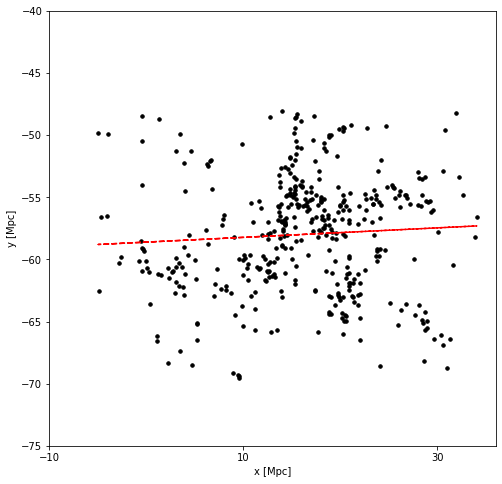

In [74]:
figura = plt.figure(figsize=(8, 8))
plt.scatter(x[select[0]], y[select[0]], color='black', s=12)

coef = np.polyfit(x[select[0]],y[select[0]],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x[select[0]], poly1d_fn(x[select[0]]), '--', color='red')

plt.xlabel('x [Mpc]')
plt.ylabel('y [Mpc]')
plt.yticks(np.arange(-75, -35, 5))
plt.xticks(np.arange(-10, 40, 20))
plt.show()

In [75]:
pto_medio = (np.min(z[select[0]])+np.max(z[select[0]]))/2

In [76]:
ptos_reta = np.array([[np.min(x[select[0]]), np.max(x[select[0]])], 
                     [poly1d_fn(np.min(x[select[0]])), poly1d_fn(np.max(x[select[0]]))],
                     [np.mean(np.array([z[select[0]][np.where(z[select[0]] < pto_medio)]])),
                     np.mean(np.array([z[select[0]][np.where(z[select[0]] > pto_medio)]]))]])

#Universo transladad
x_t = np.array(x[select[0]] - ptos_reta[0][0]) 
y_t = np.array(y[select[0]] - ptos_reta[1][0])
z_t = np.array(z[select[0]] - ptos_reta[2][0])


ptos_reta_tx = ptos_reta[0] - ptos_reta[0][0]
ptos_reta_ty = ptos_reta[1] - ptos_reta[1][0]
ptos_reta_tz = ptos_reta[2] - ptos_reta[2][0]
ptos_reta_t = [ptos_reta_tx, ptos_reta_ty, ptos_reta_tz]


# versor direção y
Y = np.array([0,1, 0])

# Calculando o ângulo entre os dois vetores 'Y' e 'ptos_reta_t'
b = np.arccos((Y[1]*ptos_reta_t[1][1])/(np.sqrt(ptos_reta_t[0][1]**2+ptos_reta_t[1][1]**2+ptos_reta_t[2][1]**2)))

# Ultilizo esse IF para concertar o sinal do angulo 'b' e me certificar que tudo está ocorrendo como o esperado.
if ptos_reta_t[0][0] > ptos_reta_t[0][1]:
    b = -b

    
# Primeira rotação depois do trasladamento.   
#rotação em z
x_tr = np.cos(b)*x_t - np.sin(b)*y_t
y_tr = np.sin(b)*x_t + np.cos(b)*y_t
z_tr = z_t
    
ptos_reta_trx = np.cos(b)*ptos_reta_tx - np.sin(b)*ptos_reta_ty
ptos_reta_try = np.sin(b)*ptos_reta_tx + np.cos(b)*ptos_reta_ty
ptos_reta_trz = ptos_reta_tz
ptos_reta_tr  = [ptos_reta_trx, ptos_reta_try, ptos_reta_trz]


# Segunda rotação depois do trasladamento.
Z = np.array([0,0,1])

c = np.arccos((Z[2]*ptos_reta_tr[2][1])/(np.sqrt(ptos_reta_tr[0][1]**2+ptos_reta_tr[1][1]**2+ptos_reta_tr[2][1]**2)))

if ptos_reta_tr[1][0] > ptos_reta_tr[1][1]:
    c = -c
    
    
#rotação em x
x_tr_2 = x_tr
y_tr_2 = np.cos(c)*y_tr - np.sin(c)*z_tr
z_tr_2 = np.sin(c)*y_tr + np.cos(c)*z_tr

ptos_reta_trx_2 = ptos_reta_trx
ptos_reta_try_2 = np.cos(c)*ptos_reta_try - np.sin(c)*ptos_reta_trz
ptos_reta_trz_2 = np.sin(c)*ptos_reta_try + np.cos(c)*ptos_reta_trz
ptos_reta_tr_2 = [ptos_reta_trx_2, ptos_reta_try_2, ptos_reta_trz_2]

In [77]:
Nbins = 8
rmin = 0.8
rmax = 6
altura = ptos_reta_tr_2[2][1]

r1 = rmin
r_medio = []
densidade = []

dlogr = np.log10(rmax/r1) / Nbins


# Calculando a distância de uma partícula até o centro do cilíndro e descartando as que estão a uma distância
# maior do que o rmax.
distancia_centro = np.sqrt(x_tr_2**2 + y_tr_2**2)[np.where(np.sqrt(x_tr_2**2 + y_tr_2**2) <= rmax)]


for n in range(0, Nbins):
    
    r2 = 10**( np.log10(r1) + dlogr )
    r_medio.append((r2+r1)/2)
    
    volume = mt.pi*altura*(r2**2 - r1**2)  
 
    cond_casca = np.where( (distancia_centro > r1) & (distancia_centro <= r2))
    qtd_galaxy = len(distancia_centro[cond_casca])
    densidade.append(qtd_galaxy/volume)
    r1 = r2

In [78]:
densidade

[0.056822575604433365,
 0.06867293277827193,
 0.04841356556414138,
 0.07104812714842472,
 0.07071253852996148,
 0.04120375966696314,
 0.04795248398734003,
 0.03900681490501748]

In [79]:
#define function
def func(x, a, b):
    return a * x + b

xdata = np.log10(np.array(r_medio))
ydata = np.log10(np.array(densidade))

#fit
params, cov = curve_fit(func, xdata, ydata)

A   = params[0]
B   = params[1]



#evaluate func using fitted parameters
xfit = np.linspace(-0.5, 0.9,100)
yfit = func(xfit, A, B)

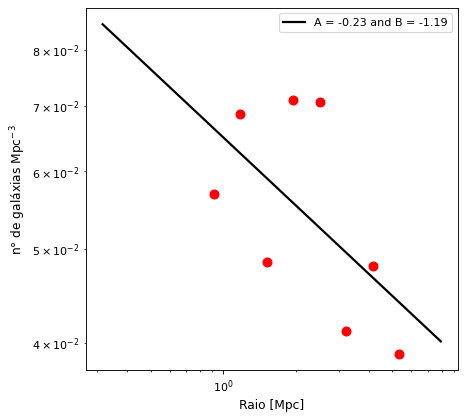

In [80]:
fig, ax = plt.subplots(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(r_medio, densidade, 'o', zorder=0, markersize=8, color='red')
plt.plot(10**(xfit), 10**(yfit), linewidth=2, color='black', label=f'A = {np.around(A, 2)} and B = {np.around(B, 2)}')


# x label
plt.xlabel('Raio [Mpc]', fontsize=11)

# y label
plt.ylabel('n° de galáxias Mpc$^{-3}$', fontsize=11)

plt.xscale("log")
plt.yscale("log")

plt.legend(loc='upper right')

plt.show()

In [81]:
dentro_do_cilindro = np.where(np.sqrt(x_tr_2**2 + y_tr_2**2) <= rmax)

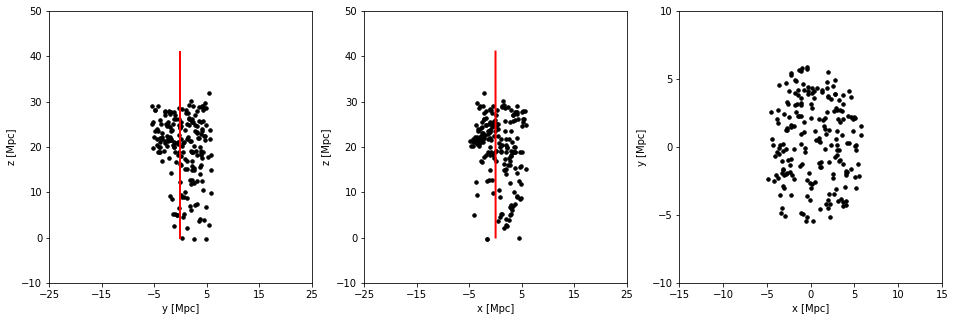

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,5))


ax1.plot(ptos_reta_tr_2[1], ptos_reta_tr_2[2], linewidth=2, color='red')
ax2.plot(ptos_reta_tr_2[0], ptos_reta_tr_2[2], linewidth=2, color='red')
ax2.plot(ptos_reta_tr_2[0], ptos_reta_tr_2[1], linewidth=2, color='red')


ax1.scatter(y_tr_2[dentro_do_cilindro], z_tr_2[dentro_do_cilindro], color='black', s=12)
ax2.scatter(x_tr_2[dentro_do_cilindro], z_tr_2[dentro_do_cilindro], color='black', s=12)
ax3.scatter(x_tr_2[dentro_do_cilindro], y_tr_2[dentro_do_cilindro], color='black', s=12)


ax1.set_xlabel('y [Mpc]')
ax1.set_ylabel('z [Mpc]')
ax1.set_yticks(np.arange(-10, 60, 10))
ax1.set_xticks(np.arange(-25, 35, 10))


ax2.set_xlabel('x [Mpc]')
ax2.set_ylabel('z [Mpc]')
ax2.set_yticks(np.arange(-10, 60, 10))
ax2.set_xticks(np.arange(-25, 35, 10))


ax3.set_xlabel('x [Mpc]')
ax3.set_ylabel('y [Mpc]')
ax3.set_yticks(np.arange(-10, 15, 5))
ax3.set_xticks(np.arange(-15, 20, 5))


plt.show()

In [19]:
print((-1.75 + 2.37)/(-1.75)*100)

-35.42857142857144
